In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
#Importing Input data
data_cohesion = np.load('Inputs/4ft_cohesion.npy')
data_friction = np.load('Inputs/4ft_friction.npy')
data_poly = np.load('Inputs/4ft_poly_feature.npy')
data_watertable = np.load('Inputs/4ft_water_table.npy')
data_velo = np.load("Targets/4ft_velocity_plots.npy")
data_watertable = np.squeeze(data_watertable)
data_velo = np.load("Targets/4ft_velocity_plots.npy")

In [3]:
#Size
data_cohesion = np.transpose(data_cohesion)
data_friction = np.transpose(data_friction)
data_watertable = np.transpose(data_watertable)
data_watertable = np.squeeze(data_watertable)
data_velo = data_velo[0:33,:,:]
print(np.shape(data_cohesion))
print(np.shape(data_friction))
print(np.shape(data_watertable))
print(np.shape(data_velo))
m = np.shape(data_cohesion)[1]
n_sim = np.shape(data_velo)[2]
n_final_test = 0
n_remain = n_sim - n_final_test
mo = np.shape(data_velo)[0]

(236091, 16)
(236091, 16)
(236091,)
(33, 33, 236091)


In [4]:
data_arr= np.zeros((n_remain,2*m + 1))
data_arr[0:n_remain,0:m] = data_cohesion[0:n_remain,:]
data_arr[0:n_remain,m:2*m] = data_friction[0:n_remain,:]
data_arr[0:n_remain,2*m] = data_watertable[0:n_remain]

In [5]:
li= []
for i in range (n_sim):
    temp = np.reshape(data_velo[:,:,i],(mo*mo,1))
    li.append(temp)
data = np.array(li)
data_y = data[0:n_remain,:,:]
data_y = np.reshape(data_y, (n_remain,mo*mo))

In [6]:
data_y1 = np.zeros((np.shape(data_y)))
for i in range(n_sim):
    data_y1[i,:] = data_y[i,:]/np.max(data_y[i,:]) 

In [7]:
case = 11
b = np.reshape(data_y1[case,:],(33,33))
a = data_arr[case]

np.save('actual.npy',b)
np.save('input.npy',a)

In [8]:
df = pd.DataFrame({"Cohesion":a[0:16],"Friction":a[16:32],"Water Table": a[32]})
df

,Cohesion,Friction,Water Table
0,0.000000,32.347001,0.853807
1,0.000000,37.364651,0.853807
2,0.000000,39.617031,0.853807
3,0.000000,36.102059,0.853807
4,219547.682447,0.000000,0.853807
5,31621.597031,0.000000,0.853807
6,0.000000,39.043152,0.853807
7,322911.890713,0.000000,0.853807
8,0.000000,39.199453,0.853807
9,0.000000,32.662891,0.853807


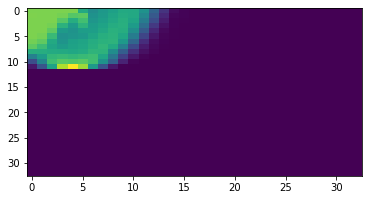

In [9]:
plt.imshow(b, aspect =0.5)

In [10]:
a

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.19547682e+05, 3.16215970e+04, 0.00000000e+00, 3.22911891e+05,
       0.00000000e+00, 0.00000000e+00, 2.31845822e+05, 2.48027935e+04,
       2.17043217e+05, 1.08893162e+05, 0.00000000e+00, 1.06493504e+05,
       3.23470005e+01, 3.73646508e+01, 3.96170309e+01, 3.61020589e+01,
       0.00000000e+00, 0.00000000e+00, 3.90431519e+01, 0.00000000e+00,
       3.91994534e+01, 3.26628907e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.66294665e+01, 0.00000000e+00,
       8.53806714e-01])

In [11]:
from pickle import load
scaler = load(open('scaler.pkl', 'rb'))
a = scaler.transform(a.reshape(-1,1))

In [12]:
a

array([[-0.85137752],
       [-0.85137752],
       [-0.85137752],
       [-0.85137752],
       [ 0.54146879],
       [-0.65076495],
       [-0.85137752],
       [ 1.19722819],
       [-0.85137752],
       [-0.85137752],
       [ 0.61949019],
       [-0.69402455],
       [ 0.52558005],
       [-0.16054154],
       [-0.85137752],
       [-0.17576536],
       [-0.8511723 ],
       [-0.85114047],
       [-0.85112618],
       [-0.85114848],
       [-0.85137752],
       [-0.85137752],
       [-0.85112982],
       [-0.85137752],
       [-0.85112883],
       [-0.8511703 ],
       [-0.85137752],
       [-0.85137752],
       [-0.85137752],
       [-0.85137752],
       [-0.85114513],
       [-0.85137752],
       [-0.8513721 ]])

In [13]:
scaler.inverse_transform(a)

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.19547682e+05],
       [3.16215970e+04],
       [0.00000000e+00],
       [3.22911891e+05],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.31845822e+05],
       [2.48027935e+04],
       [2.17043217e+05],
       [1.08893162e+05],
       [0.00000000e+00],
       [1.06493504e+05],
       [3.23470005e+01],
       [3.73646508e+01],
       [3.96170309e+01],
       [3.61020589e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.90431519e+01],
       [0.00000000e+00],
       [3.91994534e+01],
       [3.26628907e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.66294665e+01],
       [0.00000000e+00],
       [8.53806714e-01]])